In [245]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import datetime

In [246]:
step = 100

In [247]:
start = datetime.datetime.strptime("1-22-2020", "%m-%d-%Y")
end = datetime.datetime.strptime("3-25-2020", "%m-%d-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

dates = [date.strftime("%m-%d-%Y") for date in date_generated]
print(dates)

['01-22-2020', '01-23-2020', '01-24-2020', '01-25-2020', '01-26-2020', '01-27-2020', '01-28-2020', '01-29-2020', '01-30-2020', '01-31-2020', '02-01-2020', '02-02-2020', '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '02-13-2020', '02-14-2020', '02-15-2020', '02-16-2020', '02-17-2020', '02-18-2020', '02-19-2020', '02-20-2020', '02-21-2020', '02-22-2020', '02-23-2020', '02-24-2020', '02-25-2020', '02-26-2020', '02-27-2020', '02-28-2020', '02-29-2020', '03-01-2020', '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '03-13-2020', '03-14-2020', '03-15-2020', '03-16-2020', '03-17-2020', '03-18-2020', '03-19-2020', '03-20-2020', '03-21-2020', '03-22-2020', '03-23-2020', '03-24-2020']


# Cases

In [248]:
DATA_DIR = '/home/laptop/Documents/data/biology/virus/COVID-19/'
#DATA_FILE = 'csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
DATA_FILE = 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [249]:
df = pd.read_csv(DATA_DIR+DATA_FILE)
df['Country/Region']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
236    Timor-Leste
237         Belize
238         Canada
239           Laos
240          Libya
Name: Country/Region, Length: 241, dtype: object

In [250]:
df.head(n=2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123


In [251]:
df[df['Province/State'] == 'New York']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20


In [252]:
korea = df[df['Country/Region'].str.contains('Korea')]
korea = korea.iloc[:, 4:].values.ravel()
korea_idx = np.where(korea>step)[0]
korea

array([   1,    1,    2,    2,    3,    4,    4,    4,    4,   11,   12,
         15,   15,   16,   19,   23,   24,   24,   25,   27,   28,   28,
         28,   28,   28,   29,   30,   31,   31,  104,  204,  433,  602,
        833,  977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088,
       6593, 7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236,
       8320, 8413, 8565, 8652, 8799, 8961, 8961, 9037])

In [253]:
korea_ft = korea[korea_idx]
korea_ft

array([ 104,  204,  433,  602,  833,  977, 1261, 1766, 2337, 3150, 3736,
       4335, 5186, 5621, 6088, 6593, 7041, 7314, 7478, 7513, 7755, 7869,
       7979, 8086, 8162, 8236, 8320, 8413, 8565, 8652, 8799, 8961, 8961,
       9037])

In [254]:
singapore = df[df['Country/Region'].str.contains('Singapore')]
singapore = singapore.iloc[:, 4:].values.ravel()
singapore_idx = np.where(singapore>step)[0]
singapore

array([  0,   1,   3,   3,   4,   5,   7,   7,  10,  13,  16,  18,  18,
        24,  28,  28,  30,  33,  40,  45,  47,  50,  58,  67,  72,  75,
        77,  81,  84,  84,  85,  85,  89,  89,  91,  93,  93,  93, 102,
       106, 108, 110, 110, 117, 130, 138, 150, 150, 160, 178, 178, 200,
       212, 226, 243, 266, 313, 345, 385, 432, 455, 509, 558])

In [255]:
singapore_ft = singapore[singapore_idx]
singapore_ft

array([102, 106, 108, 110, 110, 117, 130, 138, 150, 150, 160, 178, 178,
       200, 212, 226, 243, 266, 313, 345, 385, 432, 455, 509, 558])

In [256]:
belgium = df[df['Country/Region'].str.contains('Belgium')]
belgium = belgium.iloc[:, 4:].values.ravel()
belgium_idx = np.where(belgium>step)[0]
belgium

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    2,    8,   13,   23,   50,
        109,  169,  200,  239,  267,  314,  314,  559,  689,  886, 1058,
       1243, 1486, 1795, 2257, 2815, 3401, 3743, 4269])

In [257]:
belgium_ft = belgium[belgium_idx]
belgium_ft

array([ 109,  169,  200,  239,  267,  314,  314,  559,  689,  886, 1058,
       1243, 1486, 1795, 2257, 2815, 3401, 3743, 4269])

In [258]:
spain = df[df['Country/Region'].str.contains('Spain')]
spain = spain.iloc[:, 4:].values.ravel()
spain_idx = np.where(spain>step)[0]
spain

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1,     1,     1,     1,     1,     1,     1,     1,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     6,    13,
          15,    32,    45,    84,   120,   165,   222,   259,   400,
         500,   673,  1073,  1695,  2277,  2277,  5232,  6391,  7798,
        9942, 11748, 13910, 17963, 20410, 25374, 28768, 35136, 39885])

In [259]:
spain_ft = spain[spain_idx]
spain_ft

array([  120,   165,   222,   259,   400,   500,   673,  1073,  1695,
        2277,  2277,  5232,  6391,  7798,  9942, 11748, 13910, 17963,
       20410, 25374, 28768, 35136, 39885])

In [260]:
italy = df[df['Country/Region'].str.contains('Italy')]
italy = italy.iloc[:, 4:].values.ravel()
italy_idx = np.where(italy>step)[0]
italy

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           2,     2,     2,     2,     2,     2,     2,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,    20,    62,   155,   229,   322,   453,
         655,   888,  1128,  1694,  2036,  2502,  3089,  3858,  4636,
        5883,  7375,  9172, 10149, 12462, 12462, 17660, 21157, 24747,
       27980, 31506, 35713, 41035, 47021, 53578, 59138, 63927, 69176])

In [261]:
italy_ft = italy[italy_idx]
italy_ft

array([  155,   229,   322,   453,   655,   888,  1128,  1694,  2036,
        2502,  3089,  3858,  4636,  5883,  7375,  9172, 10149, 12462,
       12462, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021,
       53578, 59138, 63927, 69176])

In [262]:
iran = df[df['Country/Region'].str.contains('Iran')]
iran = iran.iloc[:, 4:].values.ravel()
iran_idx = np.where(iran>step)[0]
iran

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     2,     5,    18,    28,    43,    61,    95,   139,
         245,   388,   593,   978,  1501,  2336,  2922,  3513,  4747,
        5823,  6566,  7161,  8042,  9000, 10075, 11364, 12729, 13938,
       14991, 16169, 17361, 18407, 19644, 20610, 21638, 23049, 24811])

In [263]:
iran_ft = iran[iran_idx]
iran_ft

array([  139,   245,   388,   593,   978,  1501,  2336,  2922,  3513,
        4747,  5823,  6566,  7161,  8042,  9000, 10075, 11364, 12729,
       13938, 14991, 16169, 17361, 18407, 19644, 20610, 21638, 23049,
       24811])

In [264]:
us = df[df['Country/Region'].str.contains('US')]
us = us.iloc[:, 4:].values.sum(axis=0)
us_idx = np.where(us>step)[0]
us

array([    1,     1,     2,     2,     5,     5,     5,     5,     5,
           7,     8,     8,    11,    11,    11,    11,    11,    11,
          11,    11,    12,    12,    13,    13,    13,    13,    13,
          13,    13,    13,    15,    15,    15,    51,    51,    57,
          58,    60,    68,    74,    98,   118,   149,   217,   262,
         402,   518,   583,   959,  1281,  1663,  2179,  2727,  3499,
        4632,  6421,  7783, 13677, 19100, 25489, 33276, 43847, 53740])

In [265]:
us_ft = us[us_idx]
us_ft

array([  118,   149,   217,   262,   402,   518,   583,   959,  1281,
        1663,  2179,  2727,  3499,  4632,  6421,  7783, 13677, 19100,
       25489, 33276, 43847, 53740])

In [266]:
china = df[df['Country/Region'].str.contains('China')]
china = china.iloc[:, 4:].values.sum(axis=0)
china_idx = np.where(china>step)[0]
china

array([  548,   643,   920,  1406,  2075,  2877,  5509,  6087,  8141,
        9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814,
       39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434,
       74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166,
       78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690,
       80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003,
       81033, 81058, 81102, 81156, 81250, 81305, 81435, 81498, 81591])

In [267]:
china_ft = china[china_idx]
china_ft

array([  548,   643,   920,  1406,  2075,  2877,  5509,  6087,  8141,
        9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814,
       39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434,
       74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166,
       78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690,
       80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003,
       81033, 81058, 81102, 81156, 81250, 81305, 81435, 81498, 81591])

In [268]:
germany = df[df['Country/Region'].str.contains('Germany')]
germany = germany.iloc[:, 4:].values.ravel()
germany_idx = np.where(germany>step)[0]
germany

array([    0,     0,     0,     0,     0,     1,     4,     4,     4,
           5,     8,    10,    12,    12,    12,    12,    13,    13,
          14,    14,    16,    16,    16,    16,    16,    16,    16,
          16,    16,    16,    16,    16,    16,    16,    17,    27,
          46,    48,    79,   130,   159,   196,   262,   482,   670,
         799,  1040,  1176,  1457,  1908,  2078,  3675,  4585,  5795,
        7272,  9257, 12327, 15320, 19848, 22213, 24873, 29056, 32986])

In [269]:
germany_ft = germany[germany_idx]
germany_ft

array([  130,   159,   196,   262,   482,   670,   799,  1040,  1176,
        1457,  1908,  2078,  3675,  4585,  5795,  7272,  9257, 12327,
       15320, 19848, 22213, 24873, 29056, 32986])

In [270]:
ny = df[df['Province/State'] == 'New York']
ny = ny.iloc[:, 4:].values.sum(axis=0)
ny_idx = np.where(ny>step)[0]
ny

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [271]:
ny_ft = ny[ny_idx]
ny_ft

array([], dtype=int64)

In [272]:
d = {}
d['dates'] = date_generated
d['South Korea'] = korea
d['Singapore'] = singapore
d['Belgium'] = belgium
d['Spain'] = spain
d['Italy'] = italy
d['Iran'] = iran
d['US'] = us
d['China'] = china
d['NY'] = ny
df_confirmed = pd.DataFrame(data=d)

In [273]:
df_confirmed.set_index('dates', inplace=True)

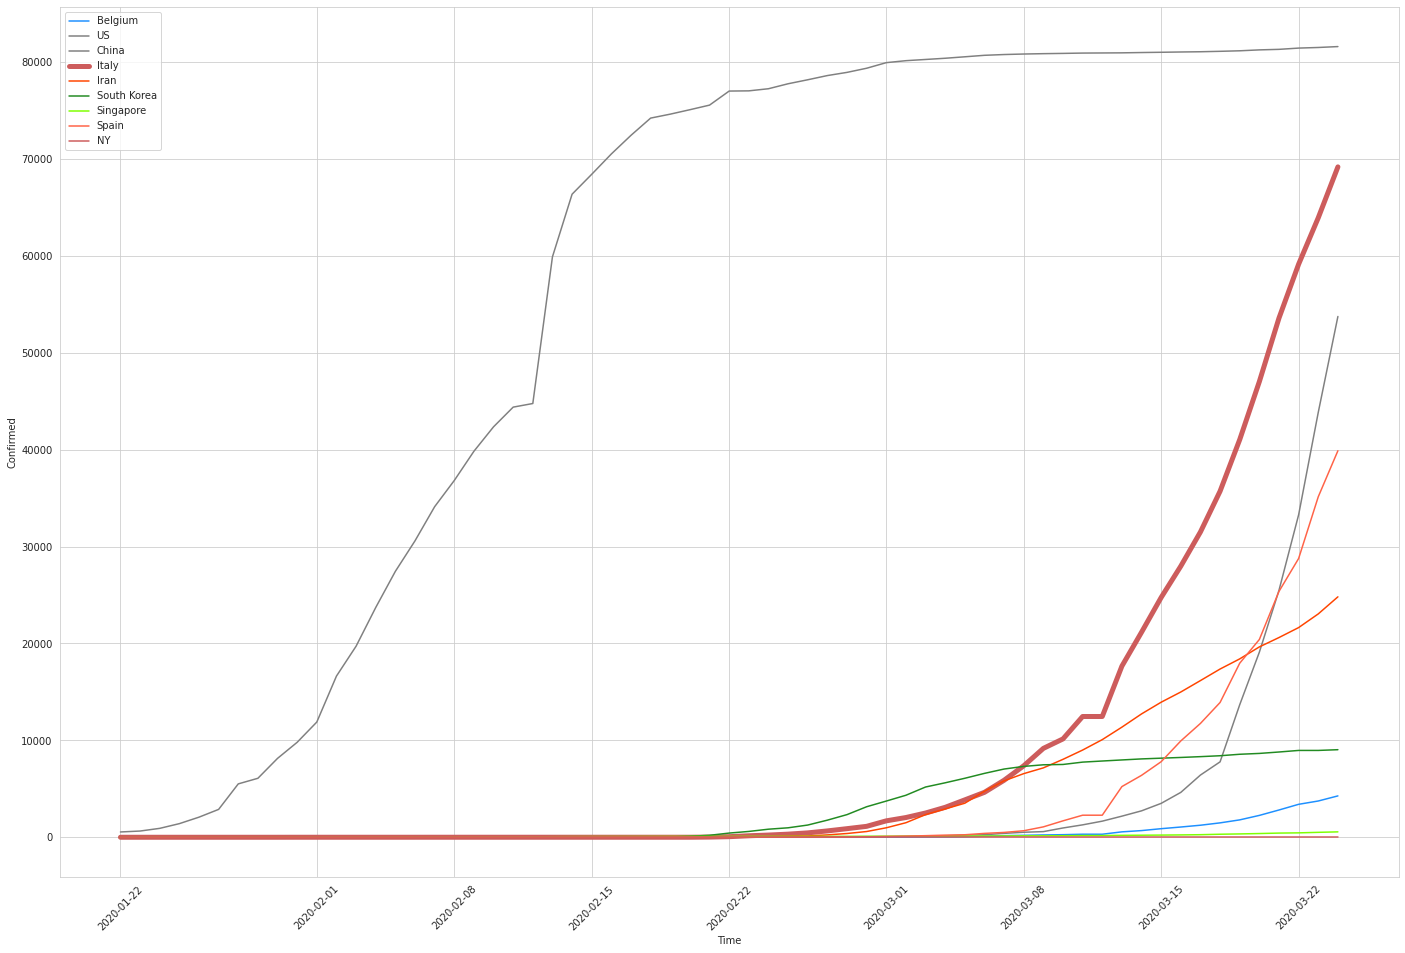

In [274]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(1,1,1)
ax.plot(df_confirmed.index, df_confirmed['Belgium'], color='dodgerblue', label='Belgium')
ax.plot(df_confirmed.index, df_confirmed['US'], color='grey', label='US')
ax.plot(df_confirmed.index, df_confirmed['China'], color='grey', label='China')
ax.plot(df_confirmed.index, df_confirmed['Italy'], color='indianred', label='Italy', linewidth=5.)
ax.plot(df_confirmed.index, df_confirmed['Iran'], color='orangered', label='Iran')
ax.plot(df_confirmed.index, df_confirmed['South Korea'], color='forestgreen', label='South Korea')
ax.plot(df_confirmed.index, df_confirmed['Singapore'], color='chartreuse', label='Singapore')
ax.plot(df_confirmed.index, df_confirmed['Spain'], color='tomato', label='Spain')
ax.plot(df_confirmed.index, df_confirmed['NY'], color='indianred', label='NY')
ax.set_xlabel("Time")
ax.set_ylabel("Confirmed")
ax.tick_params(axis ='x', rotation = 45)
ax.legend()

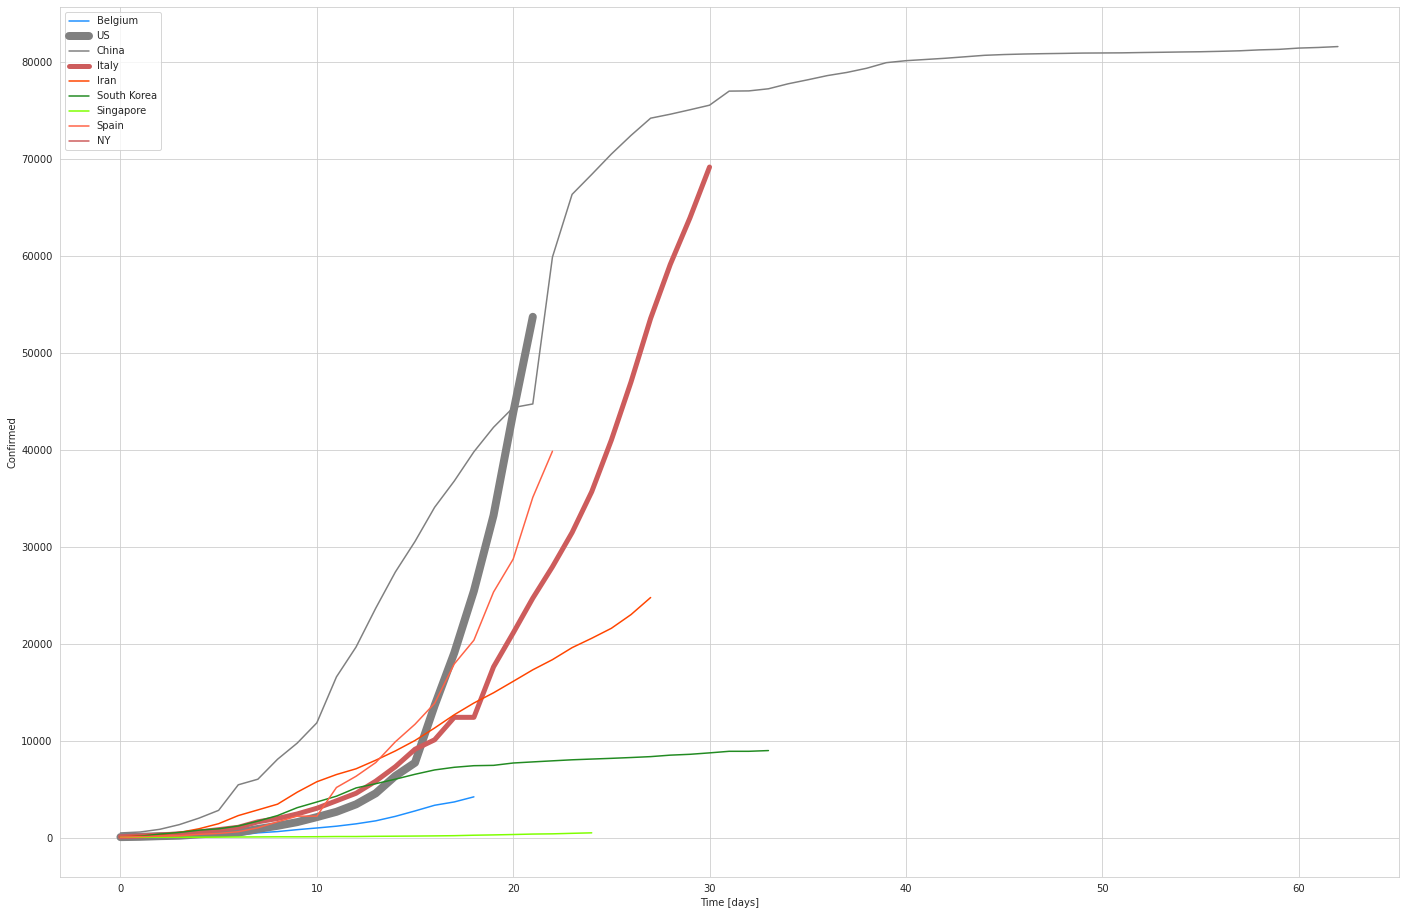

In [276]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(0, len(belgium_ft)), belgium_ft, color='dodgerblue', label='Belgium')
ax.plot(np.arange(0, len(us_ft)), us_ft, color='grey', label='US', linewidth=8.)
ax.plot(np.arange(0, len(china_ft)), china_ft, color='grey', label='China')
ax.plot(np.arange(0, len(italy_ft)), italy_ft, color='indianred', label='Italy', linewidth=5.)
ax.plot(np.arange(0, len(iran_ft)), iran_ft, color='orangered', label='Iran')
ax.plot(np.arange(0, len(korea_ft)), korea_ft, color='forestgreen', label='South Korea')
ax.plot(np.arange(0, len(singapore_ft)), singapore_ft, color='chartreuse', label='Singapore')
ax.plot(np.arange(0, len(spain_ft)), spain_ft, color='tomato', label='Spain')
ax.plot(np.arange(0, len(ny_ft)), ny_ft, color='indianred', label='NY')
ax.set_xlabel("Time [days]")
ax.set_ylabel("Confirmed")
ax.tick_params(axis ='x')
ax.legend()